In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import combinations

# Erdös–Rènyi Gnp random graph model

In [ ]:
def erdos_renyi_graph(n, p):
  g = nx.Graph()

  g.add_nodes_from(range(n))

  for u, v in combinations(g, 2):
      if random.random() < p:
          g.add_edge(u, v)
  return g

# Watts–Strogatz small-world model

In [ ]:
def watts_strogatz_graph(n, k, beta):
    # Create a ring lattice
    G = nx.Graph()
    nodes = list(range(n))
    G.add_nodes_from(nodes)
    for i in range(n):
        for j in range(1, k // 2 + 1):
            node = (i + j) % n
            G.add_edge(i, node)

    # Rewire the edges
    for i in range(n):
        for j in range(1, k // 2 + 1):
            if random.random() < beta:
                old_neighbor = (i + j) % n
                new_neighbor = random.choice(nodes)
                while new_neighbor == i or G.has_edge(i, new_neighbor):
                    new_neighbor = random.choice(nodes)
                G.remove_edge(i, old_neighbor)
                G.add_edge(i, new_neighbor)

    return G

# Barabási–Albert preferential attachment model

In [ ]:
def barabasi_albert_graph(n, m):
    # Create a graph with m initial nodes
    G = nx.Graph()
    G.add_nodes_from(range(m))

    # Create a list to store the edge lists
    edges = []

    # Attach new nodes with preferential attachment
    for i in range(m, n):
        # Calculate the degree distribution
        degrees = [G.degree(node) for node in G.nodes()]
        total_degree = sum(degrees)

        # Choose m nodes to connect with preferential attachment
        if total_degree == 0:
            targets = random.choices(list(G.nodes()), k=m)
        else:
            targets = random.choices(list(G.nodes()), weights=[deg / total_degree for deg in degrees], k=m)

        # Add the new node and its edges to the edge list
        for target in targets:
            edges.append((i, target))
            G.add_node(i)
            G.add_edge(i, target)

    # Add edges from the edge list to the graph
    G.add_edges_from(edges)

    return G


# Calculations

In [ ]:
def create_graph(name, params):
  if name == "ER":
    g = erdos_renyi_graph(params[0], params[1]) #n, p
  elif name == "SW":
    g = watts_strogatz_graph(params[0], params[1], params[2]) #n. k. beta
  elif name == "BA":
    g = barabasi_albert_graph(params[0], params[1]) #n, m
  else:
    g = nx.Graph()
  return g

In [ ]:
#create model
G = create_graph("ER", [10000, 0.50])
#G = create_graph("SW", [10000, 100, 100])
#G = create_graph("BA", [10000, 500])

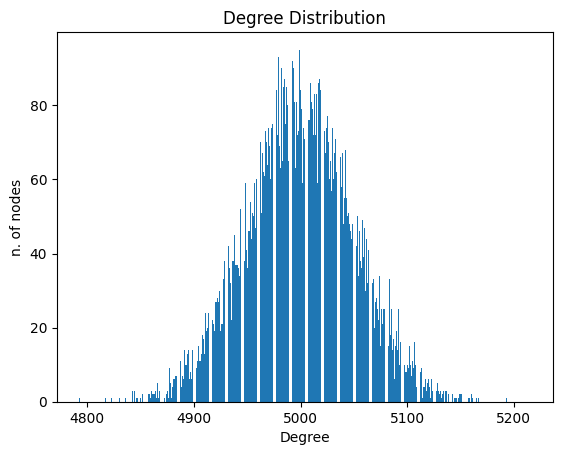

In [ ]:
# Compute degree distribution
degree_dist = dict(nx.degree(G))

# Plot degree distribution
degrees = list(degree_dist.values())
degree_values = sorted(set(degrees))
degree_counts = [degrees.count(deg) for deg in degree_values]

plt.bar(degree_values, degree_counts)
plt.xlabel('Degree')
plt.ylabel('n. of nodes')
plt.title('Degree Distribution')
plt.show()

In [ ]:
# Compute the average degree
average_degree = sum(dict(G.degree()).values()) / len(G)

print("The average degree of the graph is:", average_degree)

The average degree of the graph is: 4999.1786


In [ ]:
# Compute the diameter
diameter = nx.diameter(G)

print("The diameter of the graph is:", diameter)

The diameter of the graph is: 2


In [ ]:
# Compute the clustering coefficient
clustering_coefficient = nx.average_clustering(G)

print("The average clustering coefficient of the graph is:", clustering_coefficient)

In [ ]:
# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', width=1, alpha=0.7)
plt.title("Graph")
plt.axis('off')

plt.show()